# Certificate in Data Science | Assignment 8 |  
> University of Washington, Seattle, WA    
> January 2020  
> N. Hicks

## Problem Statement  
Mackenzie has a wine bottling factory and recently attended a followup symposium on deep learning and has returned with fascinating ideas to build neural networks to perform classification tasks. She had the idea of building a red-white wine classifier so that the bottle labels can be automatically generated. She approached your team, and suggested that you build a red-white wine classifier as a modified simple perceptron.

## Assignment Instructions  
For this assignment you will start from the perceptron neural network notebook (Simple Perceptron Neural Network.ipynb) and modify the python code to make it into a multi-layer neural network classifier. To test your system, use the RedWhiteWine.csv file with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system. To review the data attributes, download the L08_WineQuality.pdf.  Perform each of the following tasks and answer the related questions:  

1) Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector.  

2) Use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network.  

3) Be able to adjust the following between experiments:  
    - Learning Rate
    - Number of epochs
    - Depth of architecture—number of hidden layers between the input and output layers
    - Number of nodes in a hidden layer—width of the hidden layers
    - (optional) Momentum
    
4) Determine what the best neural network structure and hyperparameter settings results in the best predictive capability


## Establish the Datatset

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import os

### Import the Data

#### Functions for Scripting

In [2]:
'''
Retrieve the prescribed dataset.
INPUT:  *.csv, *.data
RETURN: pd.DataFrame
'''
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path + file, sep=',', header=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path, file), sep=',', header=0)
    
    return _df

#### Import

In [3]:
# import the sensors dataset
path = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/'   # check this repository first; else use current working directory
file = 'RedWhiteWine.csv'
wine_df = fetch_data(path, file)

REMOTE FILE USED


### Wrangle the Data

#### Functions for Scripting

In [4]:
'''
Describe all unique attributes of all dataset features
INPUT: pd.DataFrame
RETURN: pd.Series; print unique values
'''
def get_unique_vals(_df):
    features_all = _df.columns
    print('THE UNIQUE VALUES OF ALL DATASET FEATURES')
    print('=========================================')
    for feature in features_all:
        val = _df[feature].unique()
        print('\n' + str(feature) + ' ({}):\n{}'.format(len(val), val))

In [5]:
'''
Tools for viewing a dataset
INPUT: pd.DataFrame
OUTPUT: print the results
'''
def print_data_attrs(_df, unique_vals=True):
    print('\nDATASET INFO\n{}'.format(_df.info()))          # gives the structure of the data (rows/cols)
    print('\nDATASET HEAD\n{}'.format(_df.head()))          # shows the top five data entries
    print('\nDATASET DESCRIBE\n{}\n'.format(_df.describe()))      # gives the statistics on the data in the DF
    if(unique_vals): get_unique_vals(_df)   # return the unique elements of all DataFrame attributes

In [6]:
'''
Create a scale function for a single feature.
INPUT: pd.Series; a single attribute.
RETURN: a scaled column attribute.
'''
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
print_data_attrs(wine_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB

DATASET INFO
None

DATASET HEAD
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00          

 2.8  2.72 2.79 3.8  2.77 3.79 2.84 3.76 2.83 2.82]

sulphates (111):
[0.56 0.68 0.65 0.58 0.46 0.47 0.57 0.8  0.54 0.52 1.56 0.88 0.93 0.75
 1.28 0.5  1.08 0.53 0.91 0.63 0.59 0.55 0.66 0.6  0.73 0.48 0.83 0.51
 0.9  1.2  0.74 0.64 0.77 0.71 0.62 0.39 0.79 0.95 0.82 1.12 1.14 0.78
 1.95 1.22 1.98 0.61 1.31 0.69 0.67 0.7  0.49 0.92 2.   0.72 1.59 0.33
 1.02 0.97 0.85 0.43 1.03 0.86 0.76 1.61 1.09 0.84 0.96 0.45 1.26 0.87
 0.81 1.   1.36 1.18 0.89 0.98 1.13 1.04 1.11 0.99 1.07 0.44 1.06 1.05
 0.42 1.17 1.62 0.94 1.34 1.16 1.1  0.4  1.15 0.37 1.33 1.01 0.36 0.35
 0.28 0.34 0.38 0.41 0.3  0.32 0.29 0.27 0.31 0.25 0.26 0.22 0.23]

alcohol (111):
[ 9.4         9.8        10.          9.5        10.5         9.2
  9.9         9.1         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.9        10.7        12.9        10.4        13.         14.
 11.5        11.4        12.4        11.         12.2        12.8
 12.6        12.5    

#### Scale the DataFrame

In [8]:
# scale the data for improved NN performance
features = wine_df.columns.values
features = np.delete(features, len(features)-1)

for feature in features:
    wine_df[feature] = scale(wine_df[feature])

#### Define the DataFrame Features

In [9]:
X = wine_df.copy()
X = X.drop(['Class'], axis=1).values
Y = wine_df['Class'].values

# A Multi-layer Perceptron with Gradient Descent

## Functions for Scripting

In [10]:
'''
Create a numerically stable logistic
RETURN: np.array
'''
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))
    
'''
Compute the gradient of the logistic
RETURN: np.array
'''
def sigmoid_grad(z):
    sg = sigmoid(z)
    return sg * (1 - sg)

In [11]:
'''
Randomly assign the weight vector matrices; input and output weights
RETURN: np.array
'''
def init_parameters(n_features, n_hidden, n_output):
    w1 = np.random.uniform(-1.0, 1.0,
                            size=(n_hidden * (n_features + 1))).reshape(n_hidden, n_features + 1)        
    w2 = np.random.uniform(-1.0, 1.0,
                            size=(n_output * (n_hidden + 1))).reshape(n_output, n_hidden + 1)
    return w1, w2

In [12]:
'''
Update the feature matrix with an additional bias unit of '1'
RETURN: np.array
'''
def add_bias_unit(bias_X, axis):
    if axis=='column':
        X_new = np.ones((bias_X.shape[0], bias_X.shape[1] + 1))
        X_new[:, 1:] = bias_X           # establish a new feature matrix
    elif axis=='row':
        X_new = np.ones((bias_X.shape[0] + 1, bias_X.shape[1]))
        X_new[1:, :] = bias_X           # establish a new feature matrix
    
    return X_new

In [13]:
'''
Forward propogation for the multi-layer perceptron network
RETURN: np.array| activation and transfer functions
'''
def fwd_prop(X_batch, w1, w2):
    # the input nodes
    a1 = add_bias_unit(X_batch, 'column')   # first, add a bias term of '1' as a new feature
    z2 = np.dot(w1, a1.T)   # dot product of the weights and X + bias
    a2 = sigmoid(z2)        # Use sigmoid function to create a predicted vector

    # the output nodes
    a2 = add_bias_unit(a2, 'row')
    z3 = np.dot(w2, a2)
    a3 = sigmoid(z3)
    return a1, a2, a3, z2, z3

In [14]:
'''
Calculate the gradient
'''
def get_grad(a1, a2, a3, z2, Y_batch, w1, w2):
    delta_z3 = a3 - Y_batch                           # subtract weights: actual from predicted
    z2 = add_bias_unit(z2, 'row')
    delta_z2 = w2.T.dot(delta_z3) * sigmoid_grad(z2)
    delta_z2 = delta_z2[1:, :]
    grad1 = delta_z2.dot(a1)
    grad2 = delta_z3.dot(a2.T)
    
    return grad1, grad2

In [15]:
'''
Backpropagate the network to achieve improved weight vectors
'''
def back_prop(a1, a2, a3, z2, w1, w2, X_batch, Y_batch):
    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
    output = a3
    
    # Calculate the cost
    cost1 = -Y_batch * (np.log(output))
    cost2 = (1 - Y_batch) * np.log(1 - output)
    cost = (1/m) * np.sum(cost1 - cost2)

    # Calculate the gradient
    grad1, grad2 = get_grad(a1, a2, a3, z2, Y_batch, w1, w2)
    
    grads = {'dW1':grad1, 'dW2':grad2}              # Weight and bias vectors after backprop
    
    return grads, cost

In [16]:
def run_grad_desc(num_epochs, eta, alpha, X, Y, n_features, n_hidden, n_output):
    X_data, Y_data = X.copy(), Y.copy()
    loss_array = np.ones([num_epochs]) * np.nan         # resets the loss_array to NaNs
    
    # initialize the random weight matrices
    w1, w2 = init_parameters(n_features, n_hidden, n_output)

    # the momentum parameters
    delta_w1_prior = np.zeros(w1.shape)
    delta_w2_prior = np.zeros(w2.shape)
    
    # execute the training epoch
    for i in np.arange(num_epochs):
        X_data, Y_data = X.copy(), Y.copy()
        
        idx = np.random.permutation(Y_data.shape[0])     # shuffle the dataset for the epoch
        X_data, Y_data = X_data[idx], Y_data[idx]
        batch = np.array(range(Y_data.shape[0]))

        # apply the forward propagation for each feature vector
        a1, a2, a3, z2, z3 = fwd_prop(X_data[batch], w1, w2)             # get predicted vector
        grads, cost = back_prop(a1, a2, a3, z2, w1, w2, X_data[batch], Y_data[batch])       # get gradient and the cost from BP 
        loss_array[i] = cost                         # loss array gets cross ent values

        # Update the weight delta vectors (using momentum)
        delta_w1 = eta * grads['dW1']      # calc new weight vector
        delta_w2 = eta * grads['dW2']      # calc new bias vector
        
        # add the momentum terms to update the weights
        w1 -= (delta_w1 + (alpha * delta_w1_prior))
        w2 -= (delta_w2 + (alpha * delta_w2_prior))
        
        delta_w1_prior = delta_w1
        delta_w2_prior = delta_w2

        grads = {'dW1':delta_w1, 'dW2':delta_w2}   # Weight and bias vectors after back-prop
        parameter = {'W1':w1, 'W2':w2}             # assign

    return parameter, loss_array

## Train the Network

In [28]:
# Train the initial, basic, hyperparameters
epochs = 1000    # Number of Epochs
eta = 0.01       # Learning Rate
alpha = 0.9      # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 1     # Number of Hidden Layers - Depth of Architecture
n_output = 2     # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
params, loss_array = run_grad_desc(epochs, eta, alpha, X, Y, n_features, n_hidden, n_output)
# report the trained network score 'cost / loss'
print('Loss-Cost Score: {}'.format(np.round(loss_array[epochs-1], 3)))

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Loss-Cost Score: 28.247


## Plot the Loss-Cost

### Functions for Scripting

In [18]:
'''
Set the resultant plot parameters.
RETURN: none.
'''
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# set for all notebook; width, height of the resulting plots
plt.rcParams["figure.figsize"] = [10, 6.5]   # [width, height]

sns.set()

In [19]:
def cart_plot(name, var, epochs):
    # report the trained network score 'cost / loss'
    print('Loss-Cost Score: {}'.format(np.round(loss_array[epochs-1], 3)))

    # plot the cost curve
    plt.plot(loss_array)
    plt.title('Multi-Layer Perceptron Network with Back-propagation\nTraining Loss vs. Total Epoches')
    plt.xlabel('{} = {}'.format(name, var))
    plt.grid()
    plt.show()

### Plots

#### Experimental Tuning

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Learning Rate: 0.001
Loss-Cost Score: 21.951


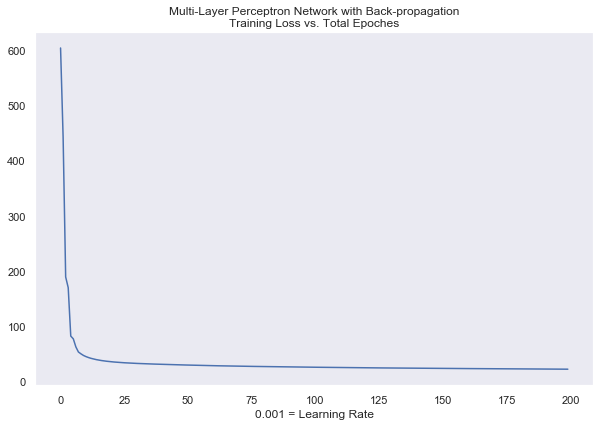

Learning Rate: 0.0025
Loss-Cost Score: 24.656


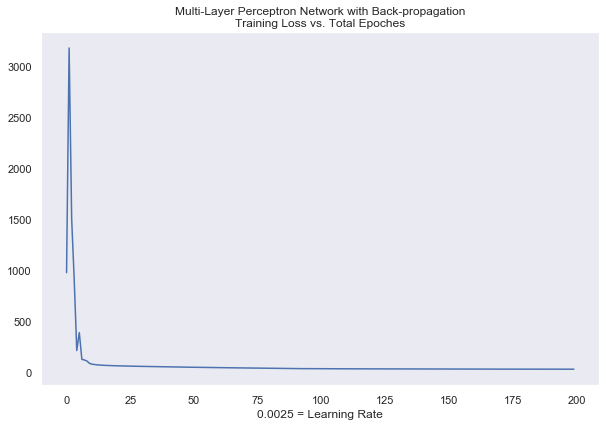

Learning Rate: 0.005
Loss-Cost Score: 26.904


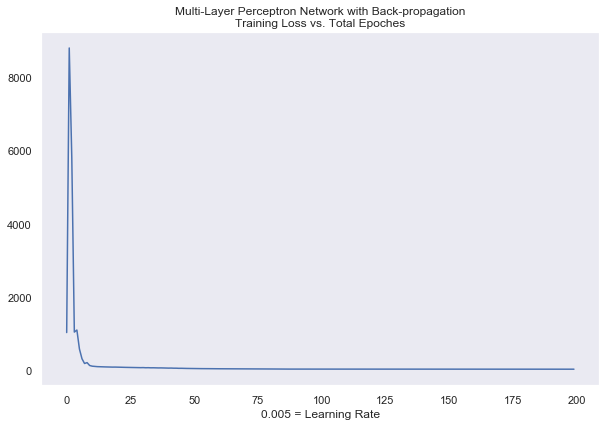

Learning Rate: 0.01


C:\Users\NateDogg\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\NateDogg\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Loss-Cost Score: nan


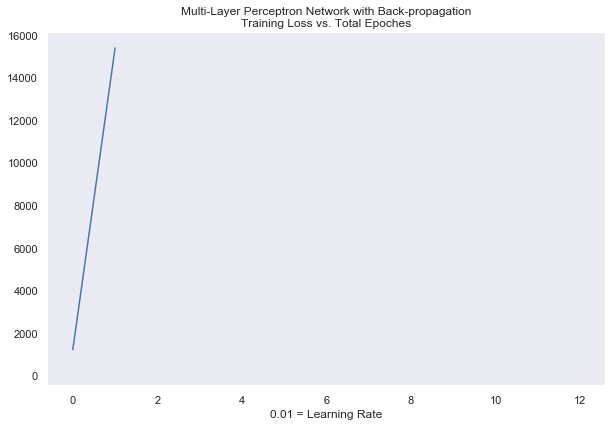

Learning Rate: 0.1
Loss-Cost Score: nan


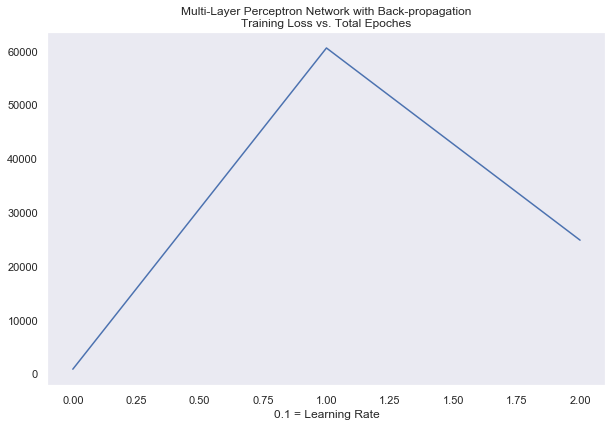

In [20]:
epochs = 200   # Number of Epochs
eta = 0.01      # Learning Rate
alpha = 0.8     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 5    # Number of Hidden Layers - Depth of Architecture
n_output = 2    # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
rates = [0.001, 0.0025, 0.005, 0.01, 0.1]
var_name = 'Learning Rate'
for eta in rates:
    print('{}: {}'.format(var_name, eta))
    params, loss_array = run_grad_desc(epochs, eta, alpha, X, Y, n_features, n_hidden, n_output)
    cart_plot(eta, var_name, epochs)

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Momentum: 0.75
Loss-Cost Score: 20.53


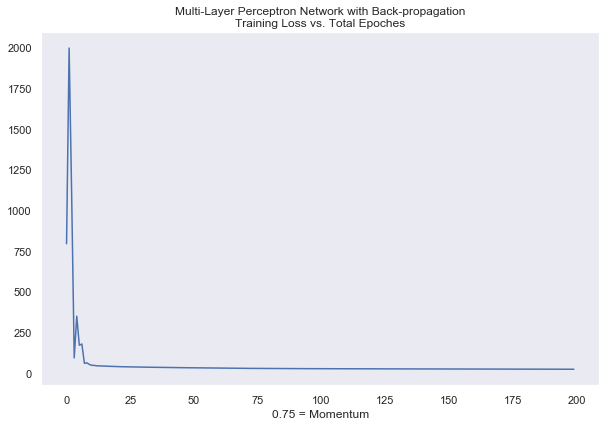

Momentum: 0.77
Loss-Cost Score: 22.376


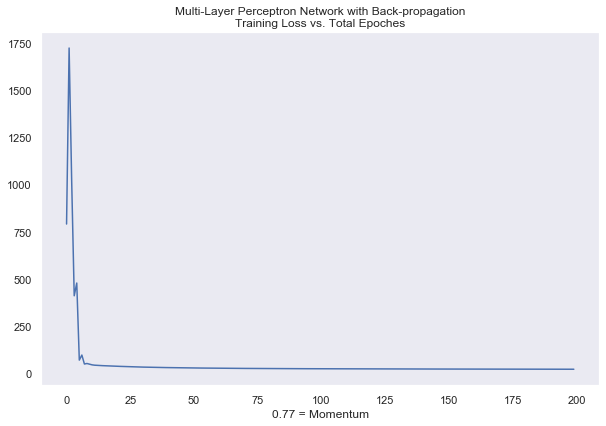

Momentum: 0.8
Loss-Cost Score: 19.188


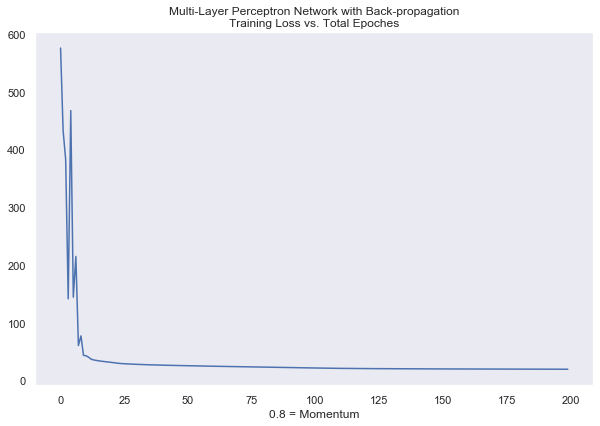

Momentum: 0.85
Loss-Cost Score: 20.747


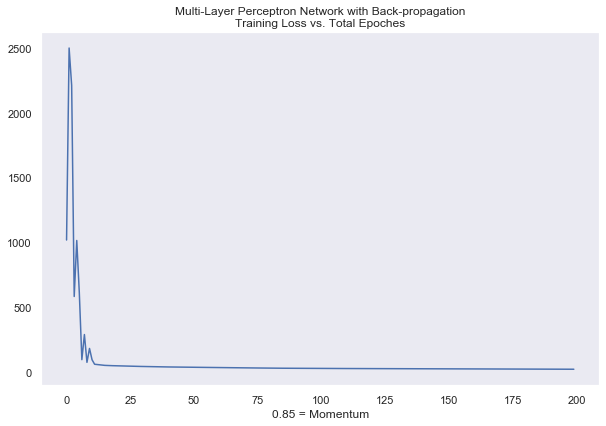

Momentum: 0.9
Loss-Cost Score: 18.9


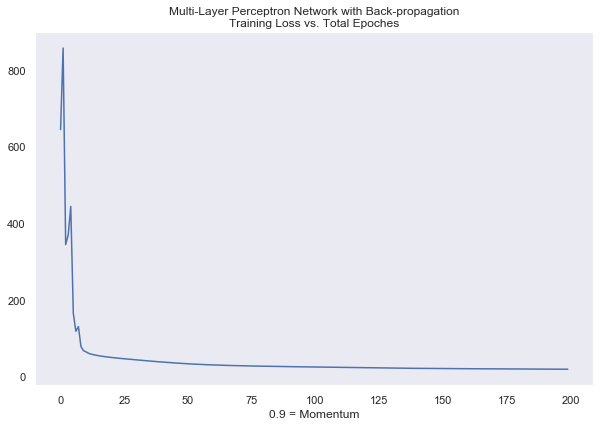

Momentum: 0.92
Loss-Cost Score: 23.007


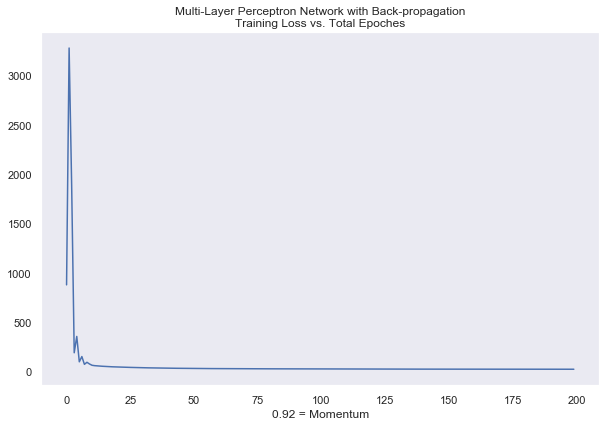

Momentum: 0.95
Loss-Cost Score: 19.01


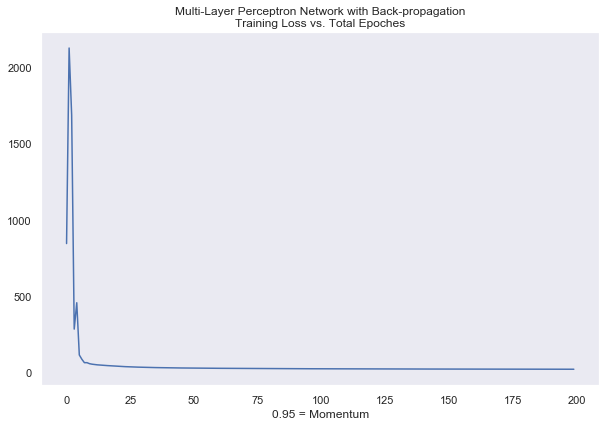

In [21]:
epochs = 200   # Number of Epochs
eta = 0.0025      # Learning Rate
alpha = 0.9     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 5    # Number of Hidden Layers - Depth of Architecture
n_output = 2    # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
momentum = [0.75, 0.77, 0.80, 0.85, 0.90, 0.92, 0.95]
var_name = 'Momentum'
for alpha in momentum:
    print('{}: {}'.format(var_name, alpha))
    params, loss_array = run_grad_desc(epochs, eta, alpha, X, Y, n_features, n_hidden, n_output)
    cart_plot(alpha, var_name, epochs)

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Hidden Layers: 1
Loss-Cost Score: 32.508


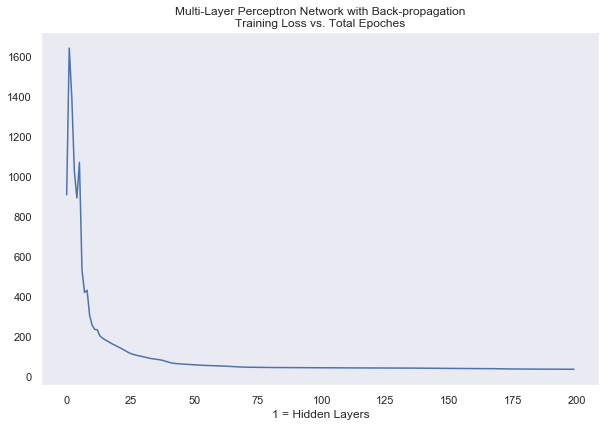

Hidden Layers: 3
Loss-Cost Score: 23.229


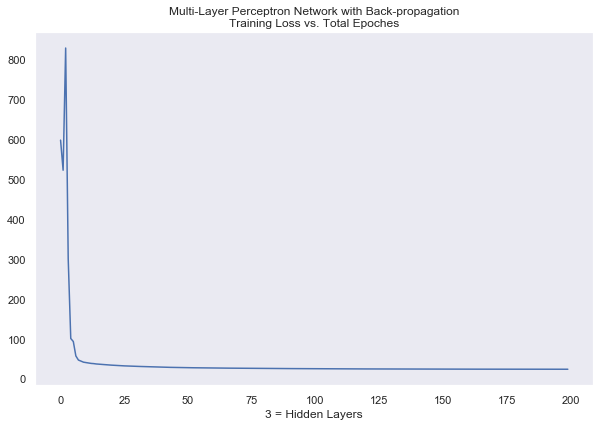

Hidden Layers: 5
Loss-Cost Score: 20.279


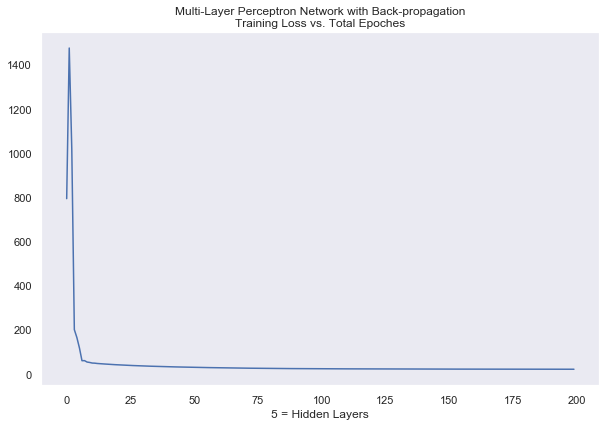

Hidden Layers: 7
Loss-Cost Score: 19.784


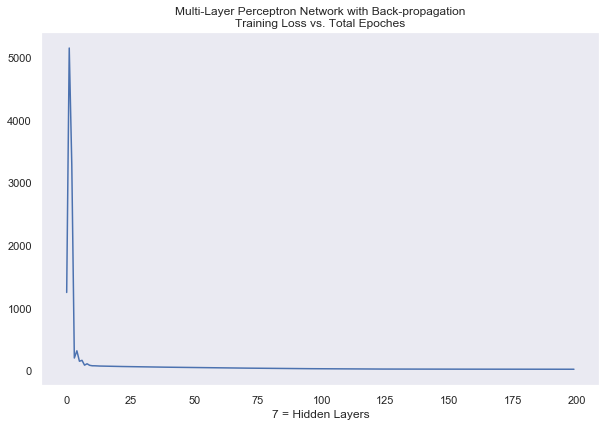

Hidden Layers: 9
Loss-Cost Score: 46.325


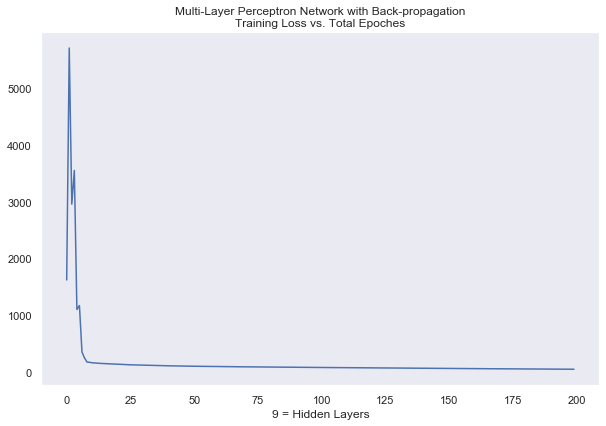

In [22]:
epochs = 200     # Number of Epochs
eta = 0.0025     # Learning Rate
alpha = 0.75     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 5     # Number of Hidden Layers - Depth of Architecture
n_output = 2     # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
hidden = [1, 3, 5, 7, 9]
var_name = 'Hidden Layers'
for n_hidden in hidden:
    print('{}: {}'.format(var_name, n_hidden))
    params, loss_array = run_grad_desc(epochs, eta, alpha, X, Y, n_features, n_hidden, n_output)
    cart_plot(n_hidden, var_name, epochs)

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Epochs: 25
Loss-Cost Score: 47.582


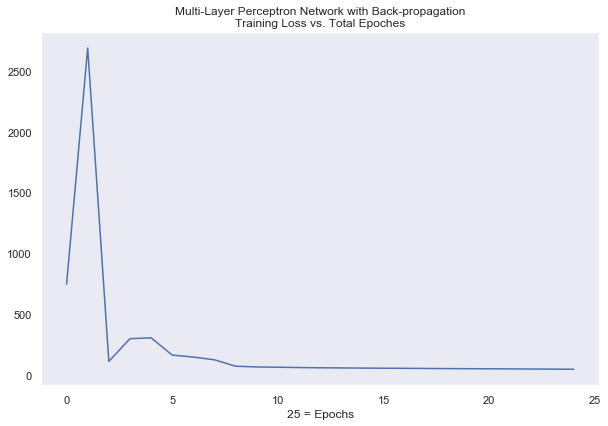

Epochs: 50
Loss-Cost Score: 40.417


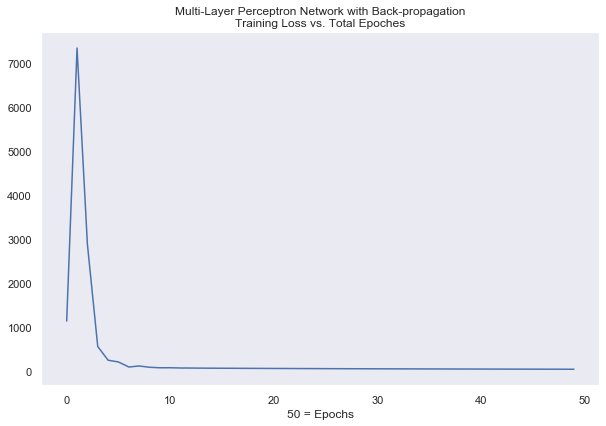

Epochs: 75
Loss-Cost Score: 75.708


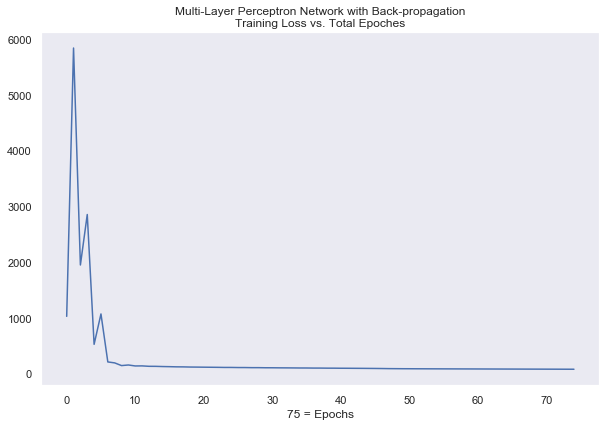

Epochs: 100
Loss-Cost Score: 16.434


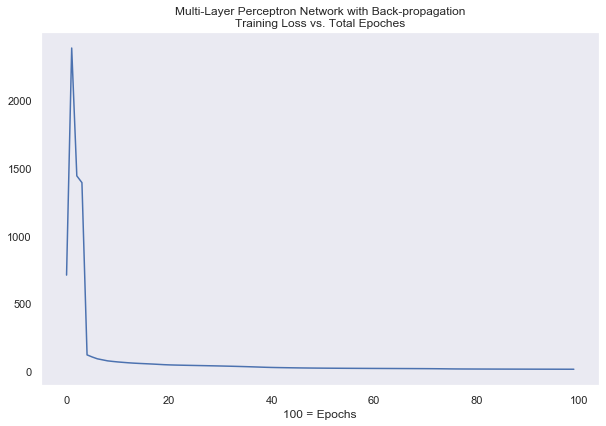

Epochs: 150
Loss-Cost Score: 22.101


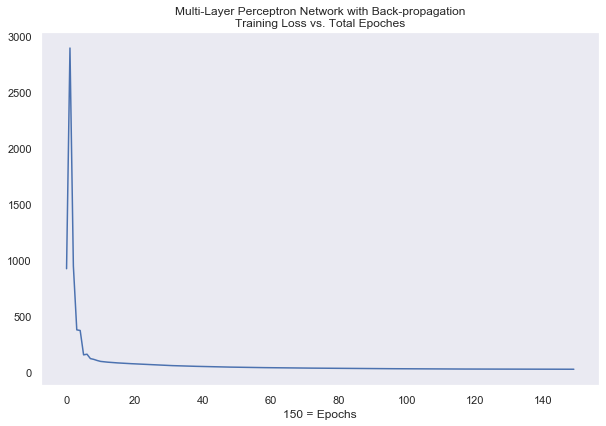

In [23]:
epochs = 200     # Number of Epochs
eta = 0.0025     # Learning Rate
alpha = 0.75     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 9     # Number of Hidden Layers - Depth of Architecture
n_output = 2     # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
n_epoches = [25, 50, 75, 100, 150]
var_name = 'Epochs'
for epochs in n_epoches:
    print('{}: {}'.format(var_name, epochs))
    params, loss_array = run_grad_desc(epochs, eta, alpha, X, Y, n_features, n_hidden, n_output)
    cart_plot(epochs, var_name, epochs)

#### Best Tuned Model

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Epochs: 50
Loss-Cost Score: 32.292


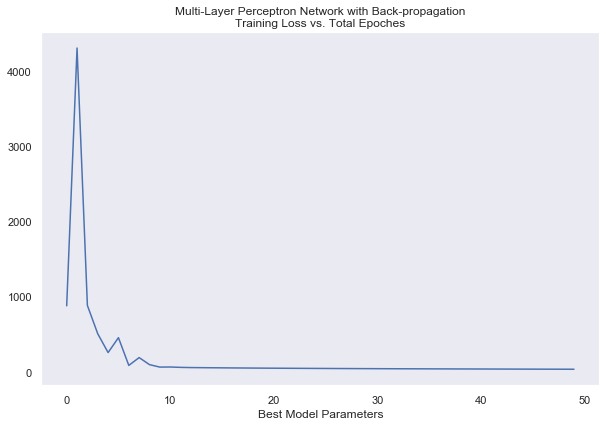

In [25]:
epochs = 50     # Number of Epochs
eta = 0.0025     # Learning Rate
alpha = 0.75     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 9     # Number of Hidden Layers - Depth of Architecture
n_output = 2     # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
print('{}: {}'.format(var_name, epochs))
params, loss_array = run_grad_desc(epochs, eta, alpha, X, Y, n_features, n_hidden, n_output)


# report the trained network score 'cost / loss'
print('Loss-Cost Score: {}'.format(np.round(loss_array[epochs-1], 3)))

# plot the cost curve
plt.plot(loss_array)
plt.title('Multi-Layer Perceptron Network with Back-propagation\nTraining Loss vs. Total Epoches')
plt.xlabel('Best Model Parameters')
plt.grid()
plt.show()

# Results

The objective of this assignment is to adapt a basic perceptron network into a multi-layer gradient descent perceptron network using the provided Jupyter Notebook as a basis to adapt from. The ultimate outcome of this excercise is to intimately understand, through direct experience, the mechanics of the network performance.

The provided dataset gives multiple features that describe qualities of wine, with a target column indicating either 'red' or 'white' style of wine in binary data type.

When adapting a perceptron network to a multi-layer network, several changes must be accomplished regarding code development, and most importantly, a grasp of the underlying perceptron performance is a requisite. As such, the first efforts to accomplish the desired multi-layer model is to understand basic principles such as:
   - Error Propagation
   - Single-layer Network
   - Perceptron
   - Multi-layer Perceptron
   - Momentum
   - Model Tuning

Additional concepts to grasp are:
   - Activation
   - Activation Function
   - Perceptron Learning Rule

Equally, understanding matrix algebra mechanics and and associated mathematical constructs is equally important to gain exposure, to gain this level of knowledge is ideally the aim of any such effort as this.

Several functions were established aside of the provided ones (initialization, sigmoid, feed forward, and back propagation): 
   - sigmoid gradient
   - add bias unit
   - get gradient

Once the code was entirely functional (as presented here), the various hyperparameters were evaluated across a range of values appropriate for that hyperparameter:
   - epochs
   - Learning Rate
   - Hidden Layers
   - Momentum

The final mnetwork model had the following tuned hyperparameters:
   - epochs           50
   - Learning Rate    0.0025
   - Hidden Layers    9
   - Momentum         0.75
   - Number Features  12
   - Output Nodes     2

In order to establish the aforementioned tuned network, both the loss score and the graphical plot were observed where the lowest of the loss scores was chosen as the hyperparameter to use as a 'best case' scenario before evaluting the next hyperparameter. With this, the best network model achieved a lost score of `32.292`.

# References

## Online Resources
- Momentum and Learning Rate Adaptation  
  https://willamette.edu/~gorr/classes/cs449/momrate.html  
<br>
- How to Code a Neural Network with Backpropagation In Python (from scratch)  
  https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/  
<br>
- Crash Course On Multi-Layer Perceptron Neural Networks  
  https://machinelearningmastery.com/neural-networks-crash-course/  
<br>
- Multi-Layer Neural Networks with Sigmoid Function— Deep Learning for Rookies (2)  
  https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f  
<br>

## Textbook Resources
- Hands-on Machine Learning, Aurelien Geron, O'reilly, 2017.  
<br>
- Python Machine Learning, Sebastian Raschka, Packt, 2016.  
<br>
- Pattern Recognition and Machine Learning, Christopher M. Bishop, Springer Science, 2006.